In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , confusion_matrix, roc_curve ,roc_auc_score,precision_score,recall_score , f1_score

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
data = pd.read_csv(r'titanic\train.csv')
test = pd.read_csv(r'titanic\test.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape

(891, 12)

In [6]:
df = data.drop(['PassengerId' , 'Name' , 'Ticket'] , axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
test = test.drop(['PassengerId' , 'Name' , 'Ticket'] , axis = 1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [8]:
test = test.drop(['Cabin'] , axis = 1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [53]:
df = data.drop(['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [54]:
df['Parch'].replace((4,5,6,3) , (2) , inplace = True)

In [55]:
test['Parch'].replace((4,5,6,3) , (2) , inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [56]:
le = LabelEncoder()

In [57]:
df['Sex'] = le.fit_transform(df['Sex'])
test['Sex'] = le.transform(test['Sex'])

In [58]:
df['Embarked'] = le.fit_transform(df['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

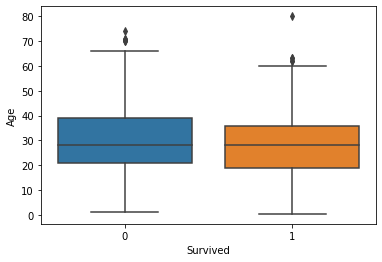

In [59]:
sns.boxplot(x = df['Survived'] ,y = df['Age'])

In [60]:
df['Age'].fillna(value = 30 , inplace = True)

In [61]:
test['Age'].fillna(test['Age'].mean() , inplace = True)
test['Fare'].fillna(test['Fare'].mean() , inplace = True)

In [62]:
X_Train = df.drop(['Survived'] , axis = 1)
Y_Train = df['Survived']

### Random Forest Classifier

In [27]:
model = RandomForestClassifier()
model.fit(X_Train , Y_Train)

RandomForestClassifier()

In [28]:
model.score(X_Train , Y_Train)

0.9797979797979798

In [97]:
pred = model.predict(test)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [99]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [66]:
X = df.drop(['Survived'] , axis = 1)
Y = df['Survived']

In [67]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [102]:
model.fit(X_Train , Y_Train)

RandomForestClassifier()

In [103]:
model.score(X_Test , Y_Test)

0.8100558659217877

In [104]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
model = LogisticRegression()

In [107]:
model.fit(X_Train , Y_Train)

LogisticRegression()

In [109]:
model.score(X_Test , Y_Test)
pred = model.predict(X_Test)

In [110]:
confusion_matrix(Y_Test , pred)

array([[107,  12],
       [ 19,  41]], dtype=int64)

In [120]:
model.fit(X,Y)

RandomForestClassifier()

In [149]:
import random

num = np.array(random.sample(range(890) , 200))

In [154]:
model.score(X.iloc[num],Y.iloc[num])

0.985

### MLPClassifier

In [64]:
from sklearn.neural_network import MLPClassifier

In [79]:
MLP = MLPClassifier( # 300 neurons 1 layer , (300,3) = 3 layers
    hidden_layer_sizes = (300,)  , activation = 'tanh' , verbose = 1 , solver = 'adam',
                   batch_size = 32 , learning_rate = 'constant' , learning_rate_init = 0.001 , max_iter = 1000)

In [82]:
MLP = MLP.fit(X_Train , Y_Train)

Iteration 1, loss = 0.65956111
Iteration 2, loss = 0.58546550
Iteration 3, loss = 0.57340145
Iteration 4, loss = 0.55411300
Iteration 5, loss = 0.55385216
Iteration 6, loss = 0.52850865
Iteration 7, loss = 0.52968846
Iteration 8, loss = 0.52384828
Iteration 9, loss = 0.50558618
Iteration 10, loss = 0.49994554
Iteration 11, loss = 0.49151541
Iteration 12, loss = 0.47859781
Iteration 13, loss = 0.48821044
Iteration 14, loss = 0.47798075
Iteration 15, loss = 0.46003283
Iteration 16, loss = 0.45890088
Iteration 17, loss = 0.45629740
Iteration 18, loss = 0.45865209
Iteration 19, loss = 0.44993509
Iteration 20, loss = 0.45002829
Iteration 21, loss = 0.45397651
Iteration 22, loss = 0.47623524
Iteration 23, loss = 0.46400493
Iteration 24, loss = 0.44541682
Iteration 25, loss = 0.45404649
Iteration 26, loss = 0.44351833
Iteration 27, loss = 0.43518553
Iteration 28, loss = 0.44087569
Iteration 29, loss = 0.44305469
Iteration 30, loss = 0.43373387
Iteration 31, loss = 0.43774512
Iteration 32, los

In [87]:
MLP.score(X_Test , Y_Test)

0.7877094972067039

### Neural Networks

In [88]:
import tensorflow as tf

In [94]:
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.models import Sequential

In [148]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = (7,)))
model.add(tf.keras.layers.Dense(300 , activation = 'relu'))
model.add(tf.keras.layers.Dense(128 , activation = 'relu'))
model.add(tf.keras.layers.Dense(64 , activation = 'relu'))
model.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 300)               2400      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 65        
Total params: 49,249
Trainable params: 49,249
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 300)               2400      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 65        
Total params: 49,249
Trainable params: 49,249
Non-trainable params: 0
_________________________________________________________________


In [150]:
Opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(Opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])                   

In [151]:
model_history = model.fit(np.asarray(X_Train).reshape(-1,7) , np.asarray(Y_Train).reshape(-1,1),steps_per_epoch = 50,
                          epochs = 300 , validation_data = (X_Test , Y_Test))

Epoch 1/300
50/50 [==============================] - 2s 14ms/step - loss: 0.7496 - accuracy: 0.6361 - val_loss: 0.5647 - val_accuracy: 0.7263
Epoch 2/300
50/50 [==============================] - 1s 10ms/step - loss: 0.6250 - accuracy: 0.6617 - val_loss: 0.5798 - val_accuracy: 0.7374
Epoch 3/300
50/50 [==============================] - 0s 7ms/step - loss: 0.6248 - accuracy: 0.6631 - val_loss: 0.6313 - val_accuracy: 0.7318
Epoch 4/300
50/50 [==============================] - 0s 8ms/step - loss: 0.6237 - accuracy: 0.6873 - val_loss: 0.5377 - val_accuracy: 0.7430
Epoch 5/300
50/50 [==============================] - 0s 8ms/step - loss: 0.5845 - accuracy: 0.7049 - val_loss: 0.5410 - val_accuracy: 0.7765
Epoch 6/300
50/50 [==============================] - 0s 8ms/step - loss: 0.5815 - accuracy: 0.6752 - val_loss: 0.5160 - val_accuracy: 0.7430
Epoch 7/300
50/50 [==============================] - 0s 7ms/step - loss: 0.5765 - accuracy: 0.7129 - val_loss: 0.4789 - val_accuracy: 0.7430
Epoch 8/300

Epoch 59/300
50/50 [==============================] - 0s 8ms/step - loss: 0.4210 - accuracy: 0.8208 - val_loss: 0.3877 - val_accuracy: 0.8268
Epoch 60/300
50/50 [==============================] - 0s 8ms/step - loss: 0.4031 - accuracy: 0.8221 - val_loss: 0.4093 - val_accuracy: 0.8380
Epoch 61/300
50/50 [==============================] - 0s 8ms/step - loss: 0.4298 - accuracy: 0.8059 - val_loss: 0.4121 - val_accuracy: 0.8101
Epoch 62/300
50/50 [==============================] - 0s 7ms/step - loss: 0.4086 - accuracy: 0.8113 - val_loss: 0.4401 - val_accuracy: 0.8380
Epoch 63/300
50/50 [==============================] - 0s 7ms/step - loss: 0.3958 - accuracy: 0.8275 - val_loss: 0.4111 - val_accuracy: 0.8436
Epoch 64/300
50/50 [==============================] - 0s 8ms/step - loss: 0.3891 - accuracy: 0.8329 - val_loss: 0.4098 - val_accuracy: 0.7989
Epoch 65/300
50/50 [==============================] - 0s 8ms/step - loss: 0.4380 - accuracy: 0.8019 - val_loss: 0.3787 - val_accuracy: 0.8436
Epoch 

50/50 [==============================] - 0s 8ms/step - loss: 0.2954 - accuracy: 0.8774 - val_loss: 0.4875 - val_accuracy: 0.8380
Epoch 174/300
50/50 [==============================] - 0s 7ms/step - loss: 0.2995 - accuracy: 0.8720 - val_loss: 0.6659 - val_accuracy: 0.8380
Epoch 175/300
50/50 [==============================] - 0s 8ms/step - loss: 0.2853 - accuracy: 0.8854 - val_loss: 0.5939 - val_accuracy: 0.8101
Epoch 176/300
50/50 [==============================] - 0s 8ms/step - loss: 0.3713 - accuracy: 0.8396 - val_loss: 0.5128 - val_accuracy: 0.8212
Epoch 177/300
50/50 [==============================] - 0s 7ms/step - loss: 0.3075 - accuracy: 0.8693 - val_loss: 0.6395 - val_accuracy: 0.8268
Epoch 178/300
50/50 [==============================] - 0s 7ms/step - loss: 0.2745 - accuracy: 0.8706 - val_loss: 0.5344 - val_accuracy: 0.8156
Epoch 179/300
50/50 [==============================] - 0s 8ms/step - loss: 0.2881 - accuracy: 0.8801 - val_loss: 0.5616 - val_accuracy: 0.8101
Epoch 180/300

50/50 [==============================] - 0s 8ms/step - loss: 0.2818 - accuracy: 0.8854 - val_loss: 0.6822 - val_accuracy: 0.8045
Epoch 231/300
50/50 [==============================] - 0s 8ms/step - loss: 0.2788 - accuracy: 0.8868 - val_loss: 0.6827 - val_accuracy: 0.8212
Epoch 232/300
50/50 [==============================] - 0s 8ms/step - loss: 0.2605 - accuracy: 0.8976 - val_loss: 0.6735 - val_accuracy: 0.7989
Epoch 233/300
50/50 [==============================] - 0s 7ms/step - loss: 0.2667 - accuracy: 0.8854 - val_loss: 0.6527 - val_accuracy: 0.8156
Epoch 234/300
50/50 [==============================] - 0s 8ms/step - loss: 0.2965 - accuracy: 0.8652 - val_loss: 0.4932 - val_accuracy: 0.8156
Epoch 235/300
50/50 [==============================] - 0s 8ms/step - loss: 0.3182 - accuracy: 0.8854 - val_loss: 0.5436 - val_accuracy: 0.8101
Epoch 236/300
50/50 [==============================] - 0s 8ms/step - loss: 0.2597 - accuracy: 0.8962 - val_loss: 0.7314 - val_accuracy: 0.8045
Epoch 237/300